# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from scipy.stats import zscore, iqr

# Reading Data with the help of Libraries

In [2]:
data = pd.read_csv("Student_Performance.csv")
data.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72.0,72.0,74.0
1,female,group C,some college,standard,completed,69.0,90.0,88.0
2,female,group B,master's degree,standard,none,90.0,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47.0,57.0,44.0
4,male,group C,some college,standard,none,76.0,78.0,75.0


# Get Statistical Analysis From Data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race/ethnicity               1000 non-null   object 
 2   parental_level_of_education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test_preparation_course      1000 non-null   object 
 5   math_score                   998 non-null    float64
 6   reading_score                996 non-null    float64
 7   writing_score                998 non-null    float64
dtypes: float64(3), object(5)
memory usage: 62.6+ KB


In [4]:
data.describe()

,math_score,reading_score,writing_score
count,998.000000,996.000000,998.000000
mean,66.093186,69.186747,68.046092
std,15.177728,14.623079,15.208213
min,0.000000,17.000000,10.000000
25%,57.000000,59.000000,57.250000
50%,66.000000,70.000000,69.000000
75%,77.000000,79.250000,79.000000
max,100.000000,100.000000,100.000000


# Dealing with the missing Data

1. Checking the Null Values

In [5]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     2
reading_score                  4
writing_score                  2
dtype: int64

2. Mean of the data

In [6]:
df2 = data.copy()
for col in data.columns:
    if df2[col].isnull().any():
        df2[col] = df2[col].fillna(value=df2[col].mean())
df2.isnull().sum()

gender                         0
race/ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

3. Forward Fill

In [7]:
df3 = data.copy()
for col in data.columns:
    if df3[col].isnull().any():
        df3[col] = df3[col].ffill()
df3.isnull().sum()

gender                         0
race/ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

4. Backward Fill

In [8]:
df4 = data.copy()
for col in data.columns:
    if df4[col].isnull().any():
        df4[col] = df4[col].bfill()
df4.isnull().sum()

gender                         0
race/ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

5. Dropping the Missing Data

In [9]:
df5 = data.copy()
df5.dropna(inplace=True)
df5.isnull().sum()

gender                         0
race/ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

6. Checking the missing data

In [10]:
data.shape, df5.shape

((1000, 8), (992, 8))

# Transform and Normalization

In [11]:
normalized_data = df2.copy()

In [12]:
for col in df2.columns:
    print(df2[col].dtype)
    if df2[col].dtype != pd.StringDtype:
        normalized_data[col] = df2[col] / df2[col].max()

object
object
object
object
object
float64
float64
float64


In [13]:
normalized_data

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,0.72,0.72,0.74
1,female,group C,some college,standard,completed,0.69,0.90,0.88
2,female,group B,master's degree,standard,none,0.90,0.95,0.93
3,male,group A,associate's degree,free/reduced,none,0.47,0.57,0.44
4,male,group C,some college,standard,none,0.76,0.78,0.75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,0.88,0.99,0.95
996,male,group C,high school,free/reduced,none,0.62,0.55,0.55
997,female,group C,high school,free/reduced,completed,0.59,0.71,0.65
998,female,group D,some college,standard,completed,0.68,0.78,0.77


# Visualization for outliers


<AxesSubplot:>

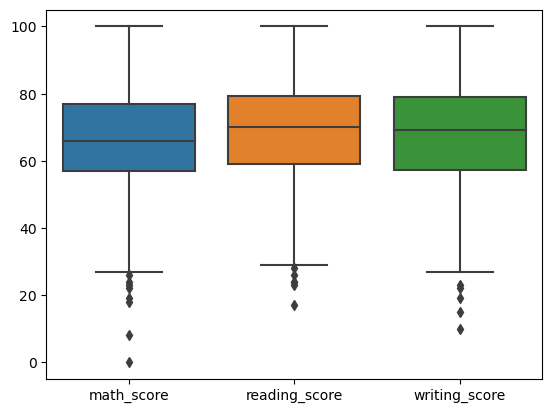

In [14]:
sns.boxplot(data=data)

Scatterplot

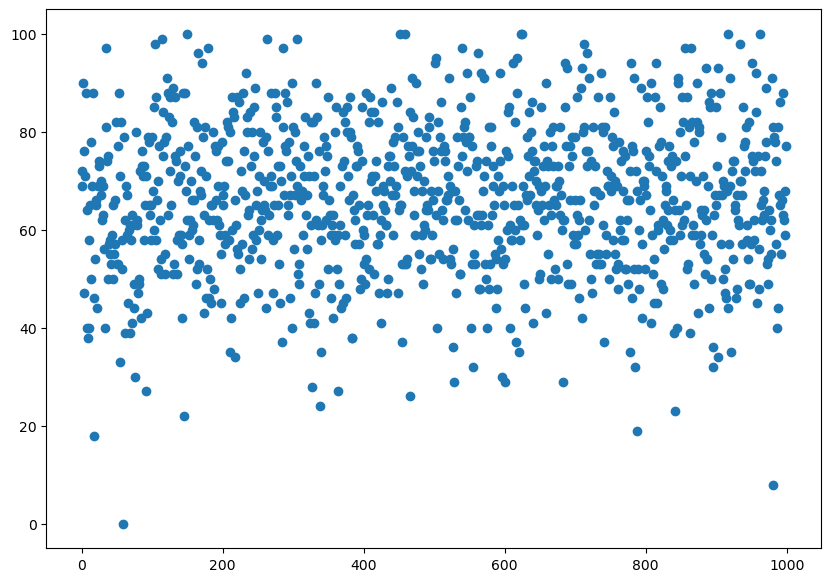

In [15]:
plt.figure(figsize=(10,7))
plt.scatter(x=df2.index, y=df2['math_score'])

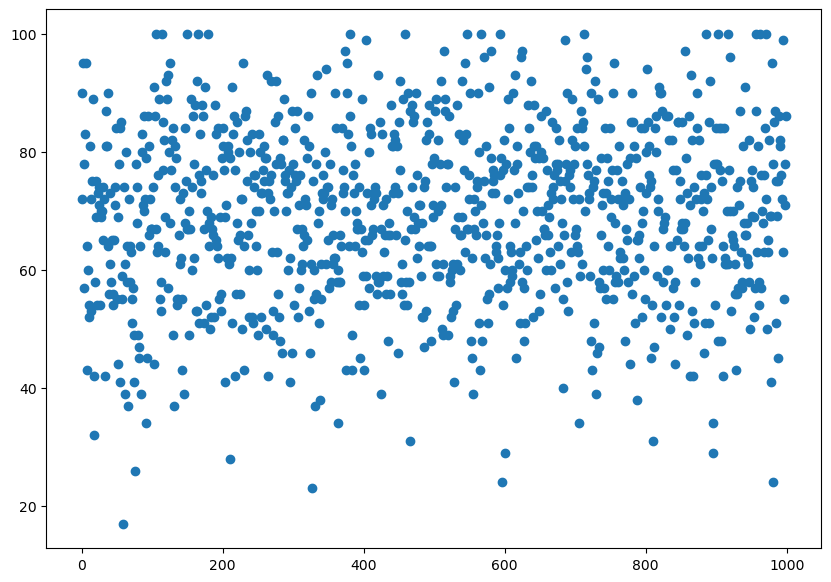

In [16]:
plt.figure(figsize=(10,7))
plt.scatter(x=df2.index, y=df2['reading_score'],)

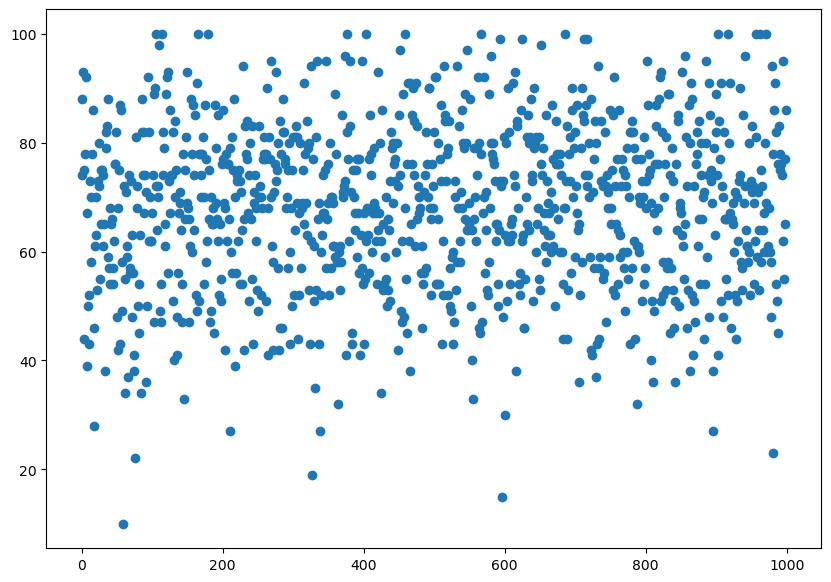

In [17]:
plt.figure(figsize=(10,7))
plt.scatter(x=df2.index, y=df2['writing_score'])